<a href="https://colab.research.google.com/github/nisanuro/CNG483-Assignment1/blob/master/CNG483_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def readImages(path):
    images = []

    for filename in os.listdir(path):
        img=cv2.imread(os.path.join(image_path, filename),cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)

    return images

In [0]:
def grey_world(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = np.average(nimg[1])
    nimg[0] = np.minimum(nimg[0]*(mu_g/np.average(nimg[0])),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/np.average(nimg[2])),255)
    return  nimg.transpose(1, 2, 0).astype(np.uint8)

In [0]:
def grayWorld(img):
    b,g,r = cv2.split(img)

    b = b + (b / b.mean().mean()).astype(np.uint8)
    g = g + (g / g.mean().mean()).astype(np.uint8)
    r = r + (r / r.mean().mean()).astype(np.uint8)

    img = cv2.merge((b,g,r))
    
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img
     


In [0]:
def displayHistRGB(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

In [0]:
def thresholding(img):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #ret,thresh = cv2.threshold(gray,150,160,cv2.THRESH_BINARY)
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Remember -> OpenCV stores things in BGR order
    lowerBound = (80,60,25)
    upperBound = (120,110,140)
    img = cv2.GaussianBlur(img,(7,7),0)
    # this gives you the mask for those in the ranges you specified,
    # but you want the inverse, so we'll add bitwise_not...
    mask = cv2.inRange(img, lowerBound, upperBound);
    #mask = mask.astype(np.uint8)
    #mask2 = cv2.bitwise_not(mask)
    #result = cv2.bitwise_and(img, img, mask=mask)
    #result = result.astype(np.uint8)
    result = cv2.bitwise_and(img,img,mask=mask)
    result = cv2.morphologyEx(result, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
    result = cv2.morphologyEx(result, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))
    '''kernel = np.ones((5,5),np.uint8)    
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)'''
    #creating an inverted mask to segment out the cloth from the frame
    #mask2 = cv2.bitwise_not(mask1)

    #Segmenting the cloth out of the frame using bitwise and with the inverted mask
    
    result[np.all(result != 0, axis=-1)] = [255, 255, 255]

    '''result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    rows, cols = result.shape

    for i in range(rows):
      for j in range(cols):
        k = result[i,j]
        if (k == [0,0,0]):
            print("HERE")'''



    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.show()


In [0]:
def threshold2(img):
    b,g,r = cv2.split(img)

    ret,r = cv2.threshold(r,25,90,cv2.THRESH_BINARY)
    ret,g = cv2.threshold(g,50,125,cv2.THRESH_BINARY)
    ret,b = cv2.threshold(b,40,110,cv2.THRESH_BINARY)

    mask = cv2.merge((b,g,r))
    plt.imshow(mask)
    plt.show()

In [0]:
def thresholdYCB(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    # Remember -> OpenCV stores things in BGR order
    lowerBound = (140,100,110)
    upperBound = (200,125,150)

    mask = cv2.inRange(img, lowerBound, upperBound);
  
    result = cv2.bitwise_and(img,img,mask=mask)
    result = cv2.morphologyEx(result, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
    result = cv2.morphologyEx(result, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))
    #result[np.all(result != 0, axis=-1)] = [255, 255, 255]
    displayHistRGB(img)

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.show()

    

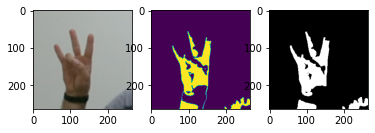

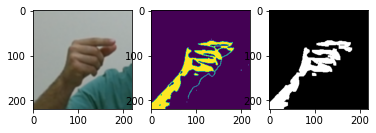

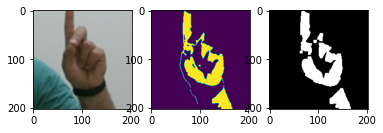

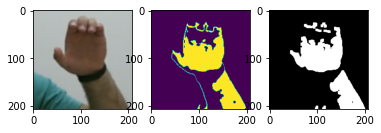

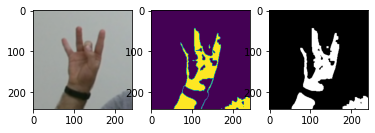

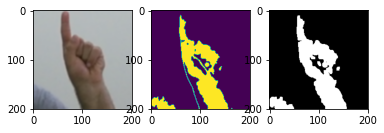

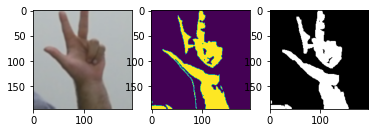

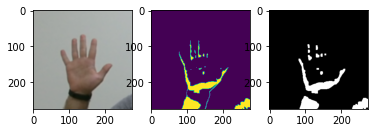

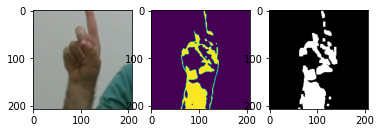

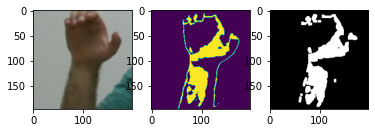

In [560]:
if __name__ == "__main__":
    image_path = "/content/drive/My Drive/Dataset"

    grey_path = "/content/drive/My Drive/GreyWorld"
    images = readImages(image_path)
    gimages = []
    for i in images:
        #print("Original")
        #plt.imshow(i)  
        #plt.show()
        
        #print("the func")
        #plt.imshow(gray_world(i))
        #plt.show()
        #print("grayWorld")
        gray = grayWorld(i)
        #plt.imshow((gray*255).astype(np.uint8))
        #plt.imshow(gray)
        #plt.show()

        #displayHistRGB(i)
        #displayHistRGB(gray)

        thresholding(gray)

        